# Master Thesis Analysis: Effects of Time Delays on Task Performance


In this notebook, we analyze the effects of **time delays** on several key metrics related to teleoperation tasks. 
This includes:
- Time Scores
- Maze Scores
- NASA-TLX Dimensions (Mental Demand, Physical Demand, Temporal Demand, Performance, Effort, Frustration)
We aim to understand how increasing time delays influence task performance and workload as reported by the participants.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = 'experiment_results.csv'
data = pd.read_csv(file_path)

# Display first few rows to verify data structure
data.head(9)


,name,age,gender,profession,gaming experience,Participant Number,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,Overall Score,Delays,Time Scores,Maze score
0,1,25,female,student,no,1,10,0,10,70,10,0,16.666667,400,71.46,47.72%
1,1,25,female,student,no,2,10,0,10,70,10,5,17.500000,1400,65.71,45.34%
2,1,25,female,student,no,3,10,0,30,70,10,0,20.000000,800,81.99,58.30%
3,2,21,male,student,yes,4,65,0,10,80,80,80,52.500000,1600,59.38,35.89%
4,2,21,male,student,yes,5,25,0,0,40,65,10,23.333333,160,93.29,51.82%
5,2,21,male,student,yes,6,35,0,5,35,40,15,21.666667,1800,71.87,38.87%
6,3,30,male,student,no,7,40,0,10,30,35,35,25.000000,1000,60.04,43.06%
7,3,30,male,student,no,8,10,0,10,5,10,5,6.666667,600,63.96,43.06%
8,3,30,male,student,no,9,5,0,5,1,5,3,3.166667,0,89.11,45.34%


In [2]:

# Converting percentage-based maze scores to numeric, removing the '%' symbol
data['Maze score'] = data['Maze score'].astype(str).str.rstrip('%').astype('float')

# Converting columns to numeric where necessary
data['Time Scores'] = pd.to_numeric(data['Time Scores'], errors='coerce')
data['Delays'] = pd.to_numeric(data['Delays'], errors='coerce')

# Ensure all NASA TLX dimensions are numeric as well
nasa_tlx_columns = ['Mental Demand','Temporal Demand', 'Performance', 'Effort', 'Frustration', 'Overall Score']
data[nasa_tlx_columns] = data[nasa_tlx_columns].apply(pd.to_numeric, errors='coerce')

# Get rid of participant 10, as they did not complete the maze
data = data[data['name'] != 10]

# Get rid of Participant Number Column
data = data.drop(columns=['Participant Number'])

# Display first few rows to verify data structure
data.head(48)


,name,age,gender,profession,gaming experience,Mental Demand,Physical Demand,Temporal Demand,Performance,Effort,Frustration,Overall Score,Delays,Time Scores,Maze score
0,1,25,female,student,no,10,0,10,70,10,0,16.666667,400,71.46,47.72
1,1,25,female,student,no,10,0,10,70,10,5,17.500000,1400,65.71,45.34
2,1,25,female,student,no,10,0,30,70,10,0,20.000000,800,81.99,58.30
3,2,21,male,student,yes,65,0,10,80,80,80,52.500000,1600,59.38,35.89
4,2,21,male,student,yes,25,0,0,40,65,10,23.333333,160,93.29,51.82
5,2,21,male,student,yes,35,0,5,35,40,15,21.666667,1800,71.87,38.87
6,3,30,male,student,no,40,0,10,30,35,35,25.000000,1000,60.04,43.06
7,3,30,male,student,no,10,0,10,5,10,5,6.666667,600,63.96,43.06
8,3,30,male,student,no,5,0,5,1,5,3,3.166667,0,89.11,45.34
9,4,27,male,software engineer,yes,74,0,80,30,80,85,58.166667,1800,115.19,45.34


In [3]:
# Describe the data without name and age
data.drop(columns=['name', 'age']).describe().T

,count,mean,std,min,25%,50%,75%,max
Mental Demand,45.0,38.644444,22.887229,5.000000,20.000000,40.000000,60.000000,80.000000
Physical Demand,45.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Temporal Demand,45.0,25.111111,23.656848,0.000000,5.000000,20.000000,40.000000,80.000000
Performance,45.0,33.022222,20.590696,0.000000,20.000000,30.000000,40.000000,80.000000
Effort,45.0,39.666667,25.167620,0.000000,15.000000,40.000000,60.000000,80.000000
Frustration,45.0,22.066667,24.838936,0.000000,0.000000,10.000000,35.000000,85.000000
Overall Score,45.0,26.474074,13.041114,3.166667,18.333333,24.166667,31.666667,58.166667
Delays,45.0,784.000000,602.503866,0.000000,320.000000,800.000000,1200.000000,1800.000000
Time Scores,45.0,69.856889,14.006296,56.800000,60.230000,63.960000,74.630000,119.290000
Maze score,45.0,55.846444,17.492528,35.890000,43.060000,50.240000,65.610000,100.000000


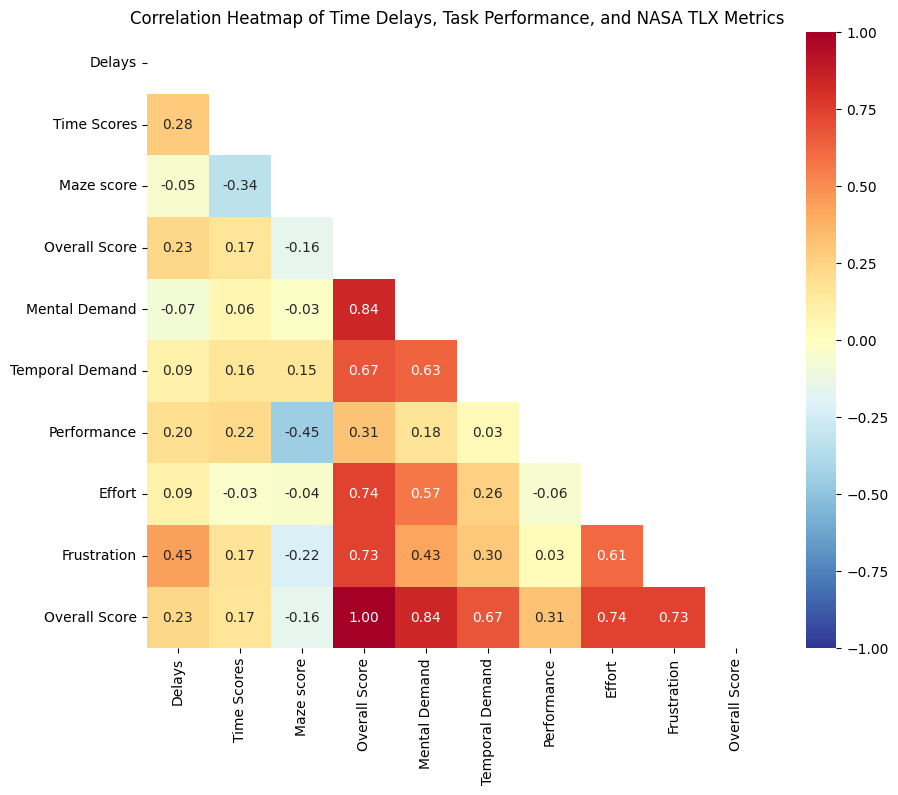

In [4]:
# Generate a correlation heatmap of the relevant variables
plt.figure(figsize=(10, 8))

# Compute the correlation matrix
corr_matrix = data[['Delays', 'Time Scores', 'Maze score', 'Overall Score'] + nasa_tlx_columns].corr()

# Mask the upper triangle to avoid redundancy
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', fmt='.2f', vmin=-1, vmax=1, mask=mask)
plt.title('Correlation Heatmap of Time Delays, Task Performance, and NASA TLX Metrics')
plt.show()


C:\Users\raul_\AppData\Local\Temp\ipykernel_1140\2012516819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Delays', y='Time Scores', data=data, errorbar='sd', capsize=0.1, palette='GnBu_d')


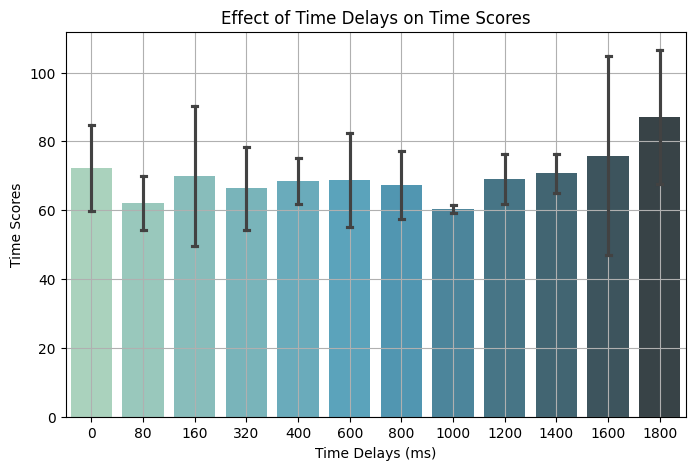

In [5]:
# Generate a barplot of the effect of time delays on time scores
plt.figure(figsize=(8, 5))
sns.barplot(x='Delays', y='Time Scores', data=data, errorbar='sd', capsize=0.1, palette='GnBu_d')
plt.title('Effect of Time Delays on Time Scores')
plt.xlabel('Time Delays (ms)')
plt.ylabel('Time Scores')
plt.grid(True)
plt.show()


C:\Users\raul_\AppData\Local\Temp\ipykernel_1140\1618362280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Delays', y='Maze score', data=data, errorbar='sd', capsize=0.1, palette='YlGn_d')


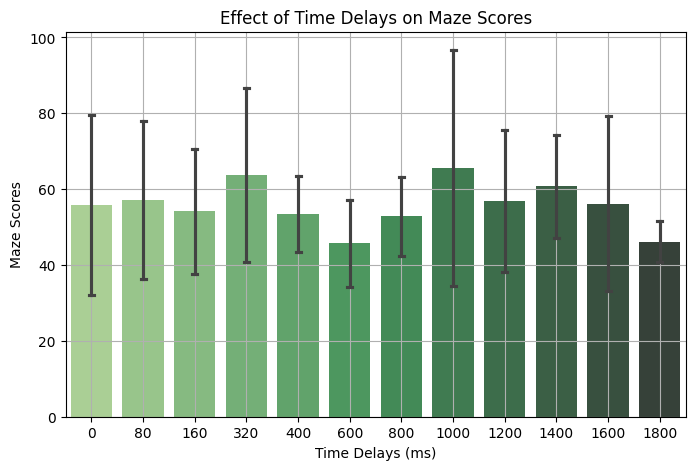

In [6]:
# Barplot: Maze score vs Delays
plt.figure(figsize=(8, 5))
sns.barplot(x='Delays', y='Maze score', data=data, errorbar='sd', capsize=0.1, palette='YlGn_d')
plt.title('Effect of Time Delays on Maze Scores')
plt.xlabel('Time Delays (ms)')
plt.ylabel('Maze Scores')
plt.grid(True)
plt.show()


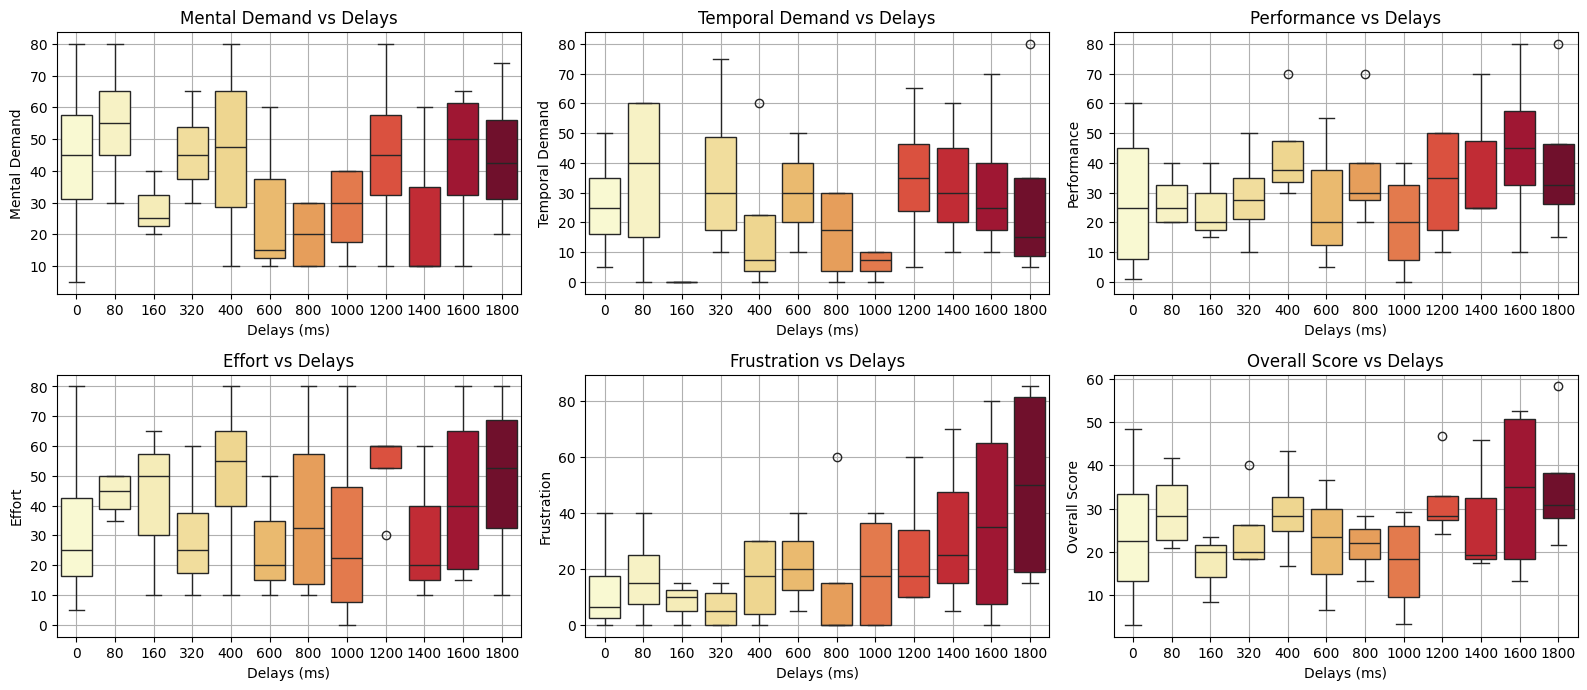

In [7]:

plt.figure(figsize=(16, 10))

# Ensure the number of subplots does not exceed 9
nasa_tlx_columns = nasa_tlx_columns[:9]

for i, dim in enumerate(nasa_tlx_columns, 1):
    plt.subplot(3, 3, i)  # Adjusted to a 3x3 grid
    sns.boxplot(data=data, x='Delays', y=dim, palette='YlOrRd', hue='Delays', legend=False)
    plt.title(f'{dim} vs Delays')
    plt.xlabel('Delays (ms)')
    plt.ylabel(dim)
    plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\raul_\AppData\Local\Temp\ipykernel_1140\1553801489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Delays', y='Overall Score', data=data, errorbar='sd', capsize=0.1, palette='autumn')


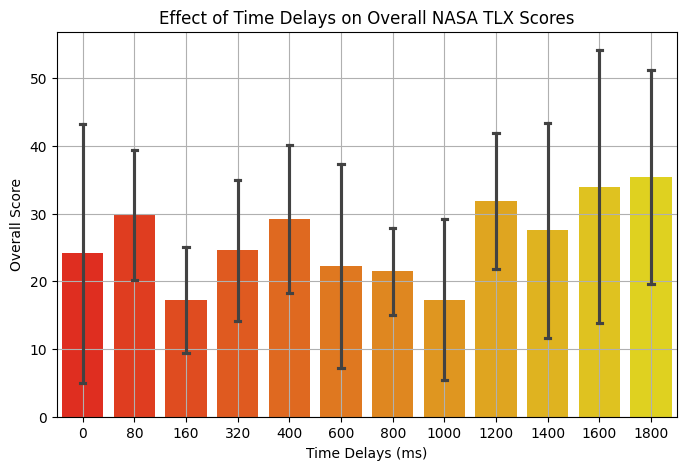

In [8]:
# Barplot: Overall Score vs Delays
plt.figure(figsize=(8, 5))
sns.barplot(x='Delays', y='Overall Score', data=data, errorbar='sd', capsize=0.1, palette='autumn')
plt.title('Effect of Time Delays on Overall NASA TLX Scores')
plt.xlabel('Time Delays (ms)')
plt.ylabel('Overall Score')
plt.grid(True)
plt.show()



### Analysis Summary
1. **Time Scores vs Delays**: As expected, time scores increase as time delays grow, indicating that participants took longer to complete tasks with higher latency.
2. **Maze Scores vs Delays**: Maze scores tend to decrease with increasing delays, suggesting that higher time delays impact participants' situational awareness and ability to reconstruct the maze.
3. **NASA-TLX Metrics**: Mental demand, effort, and frustration increase significantly with higher time delays, while physical demand remains relatively low and unaffected across all delays. Performance decreases as delays increase, reflecting participants' perceived difficulty in managing the tasks.


## Regression OLS results

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Clean up the Maze Score column (convert from percentage strings to floats)

# Define the independent and dependent variables
independent_var = 'Delays'
dependent_vars = ['Time Scores', 'Maze score', 'Mental Demand', 'Temporal Demand', 
                  'Performance', 'Effort', 'Frustration', 'Overall Score']

# Prepare a list to collect OLS regression results
regression_results = []

# Perform OLS regression for each dependent variable
for dependent_var in dependent_vars:
    if dependent_var in data.columns and pd.api.types.is_numeric_dtype(data[dependent_var]):
        X = sm.add_constant(data[independent_var])  # Add a constant to the independent variable
        y = data[dependent_var]  # Dependent variable

        # Fit the OLS model
        model = sm.OLS(y, X).fit()

        # Get the confidence intervals for the independent variable
        conf_int = model.conf_int().loc[independent_var]

        # Append the results to the list
        regression_results.append({
            "Dependent Variable": dependent_var,
            "Coefficient": model.params[independent_var],
            "Standard Error": model.bse[independent_var],
            "t-Value": model.tvalues[independent_var],
            "P>|t|": model.pvalues[independent_var],
            "95% Confidence Interval": f"[{conf_int[0]:.3f}, {conf_int[1]:.3f}]"
        })

# Convert the results to a DataFrame for better presentation
regression_summary_df = pd.DataFrame(regression_results)

# Display the consolidated OLS regression results
print(f"Independent Variable: {independent_var}\n")
regression_summary_df

Independent Variable: Delays



,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time Scores,0.006592,0.003400,1.939169,0.059060,"[-0.000, 0.013]"
1,Maze score,-0.001582,0.004421,-0.357845,0.722210,"[-0.010, 0.007]"
2,Mental Demand,-0.002741,0.005778,-0.474349,0.637651,"[-0.014, 0.009]"
3,Temporal Demand,0.003486,0.005964,0.584497,0.561940,"[-0.009, 0.016]"
4,Performance,0.006923,0.005104,1.356470,0.182029,"[-0.003, 0.017]"
5,Effort,0.003691,0.006345,0.581754,0.563770,"[-0.009, 0.016]"
6,Frustration,0.018350,0.005630,3.259337,0.002187,"[0.007, 0.030]"
7,Overall Score,0.005027,0.003211,1.565794,0.124727,"[-0.001, 0.012]"


C:\Users\raul_\AppData\Local\Temp\ipykernel_1140\1500472353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, palette=palette, ax=ax, hue=hue)
C:\Users\raul_\AppData\Local\Temp\ipykernel_1140\1500472353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, palette=palette, ax=ax, hue=hue)
C:\Users\raul_\AppData\Local\Temp\ipykernel_1140\1500472353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, palette=palette, ax=ax, hue=hue)


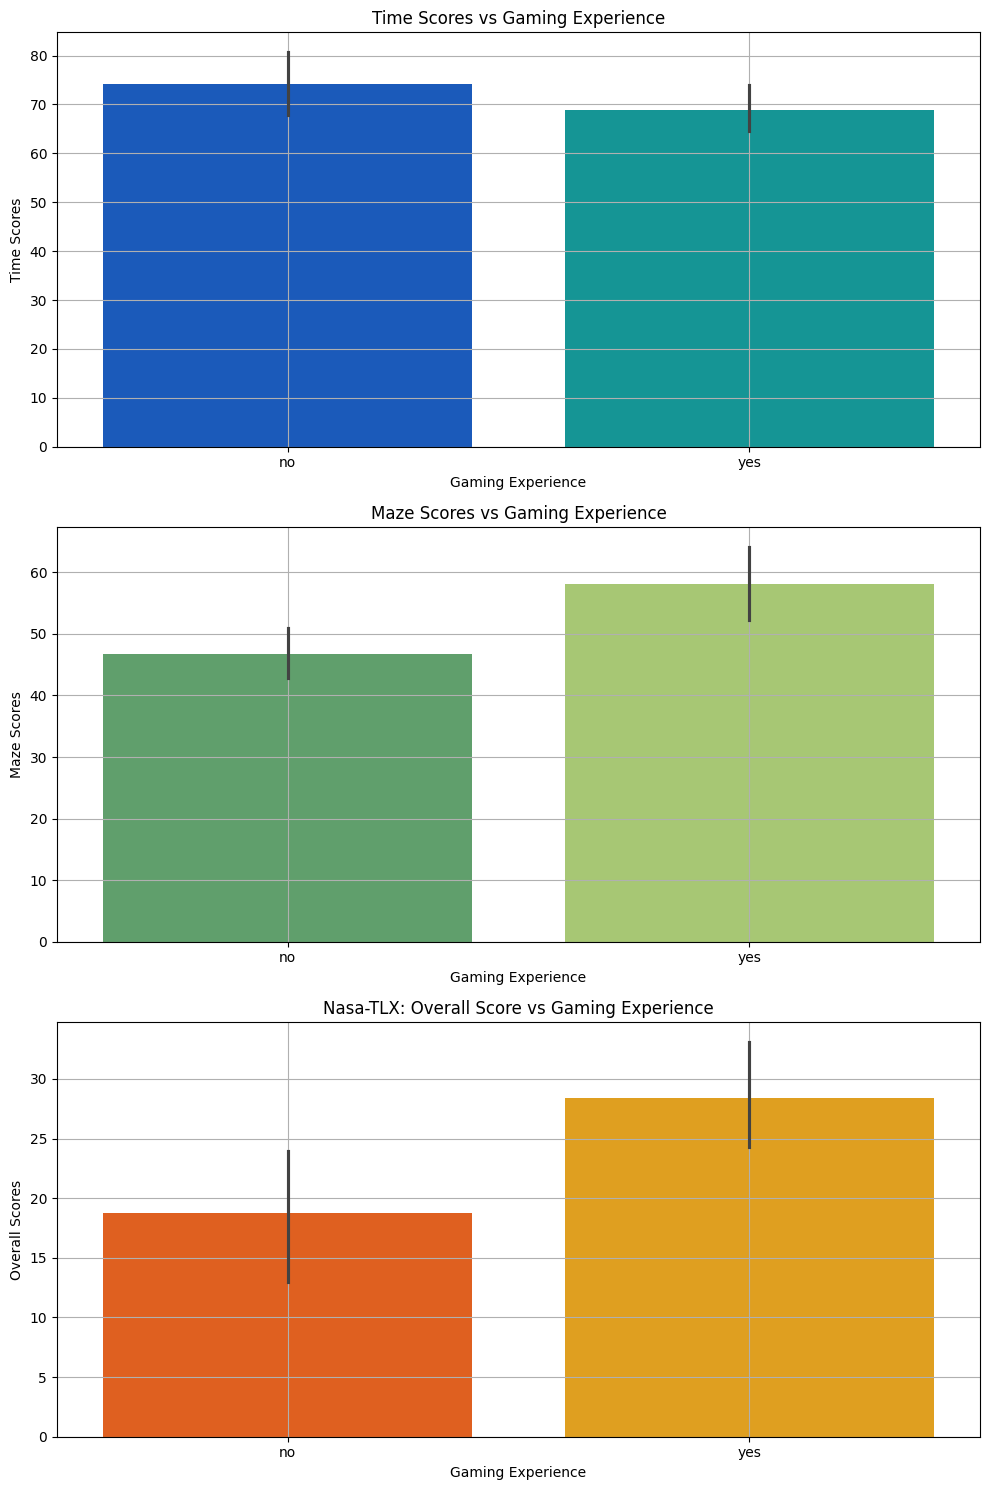

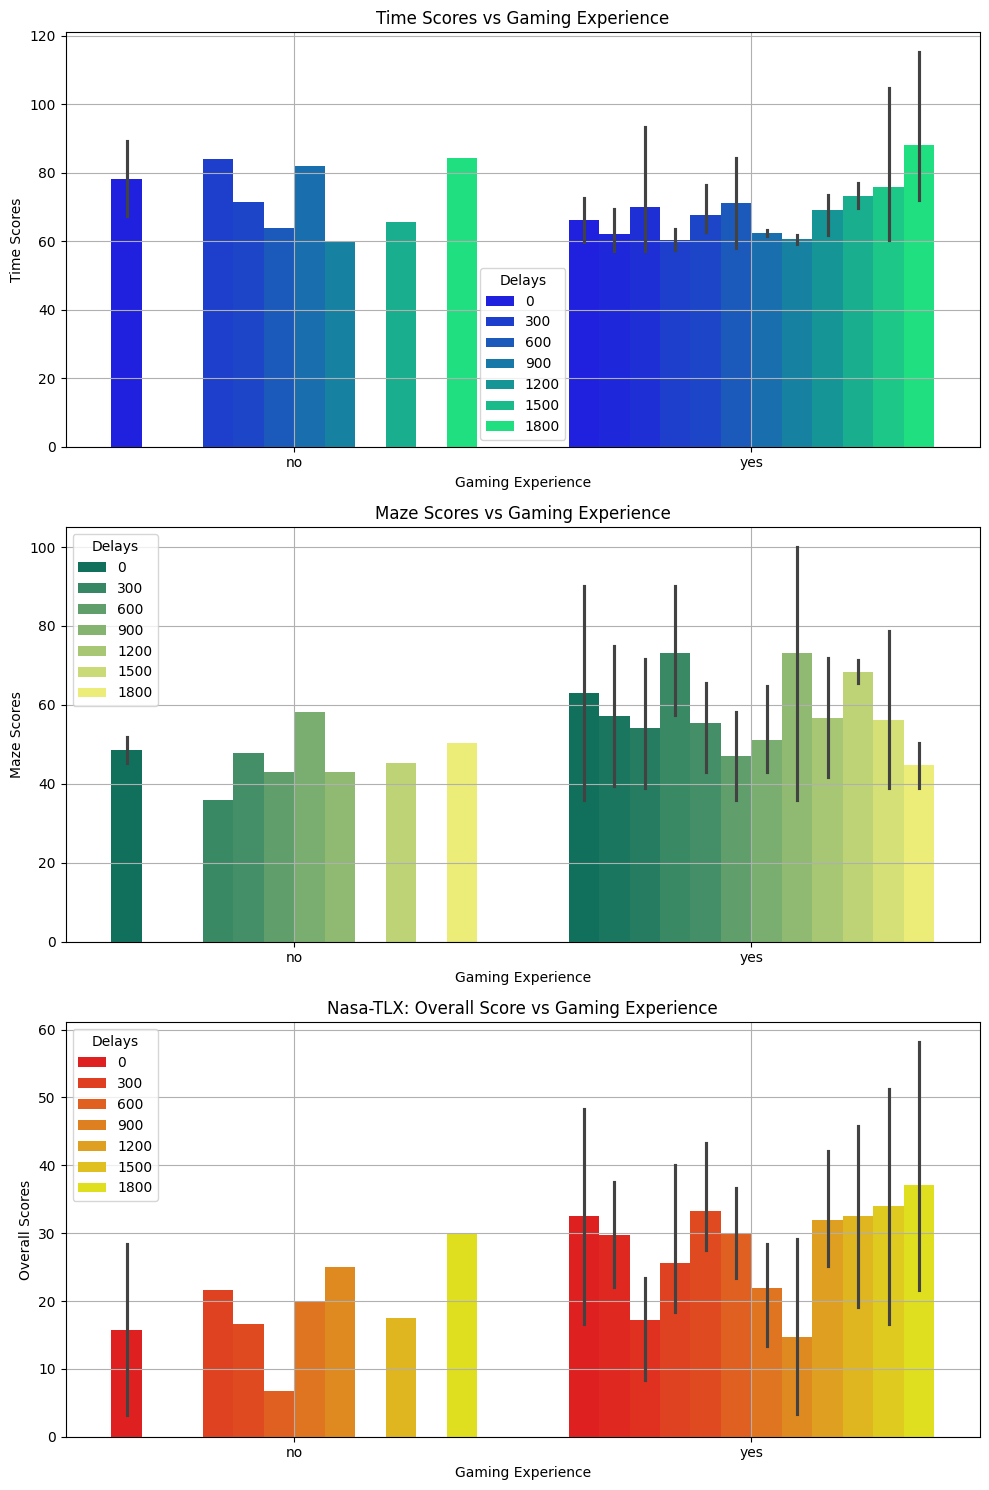

In [10]:
# Create subplots for bar plots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Create a function for the bar plots
def create_bar_plot(data, x, y, title, xlabel, ylabel, palette, ax, hue=None):
    sns.barplot(data=data, x=x, y=y, palette=palette, ax=ax, hue=hue)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)

# Bar plot of Time Scores vs Gaming Experience
create_bar_plot(data, 'gaming experience', 'Time Scores', 'Time Scores vs Gaming Experience',
                'Gaming Experience', 'Time Scores', 'winter', axes[0])

# Bar plot of Maze Scores vs Gaming Experience
create_bar_plot(data, 'gaming experience', 'Maze score', 'Maze Scores vs Gaming Experience',
                'Gaming Experience', 'Maze Scores', 'summer', axes[1])

# Bar plot of Overall Scores vs Gaming Experience
create_bar_plot(data, 'gaming experience', 'Overall Score', 'Nasa-TLX: Overall Score vs Gaming Experience',
                'Gaming Experience', 'Overall Scores', 'autumn', axes[2])

# Adjust layout
plt.tight_layout()
plt.show()



# Create subplots for bar plots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Bar plot of Time Scores vs Gaming Experience
create_bar_plot(data, 'gaming experience', 'Time Scores', 'Time Scores vs Gaming Experience',
                'Gaming Experience', 'Time Scores', 'winter', axes[0], hue='Delays')


# Bar plot of Maze Scores vs Gaming Experience
create_bar_plot(data, 'gaming experience', 'Maze score', 'Maze Scores vs Gaming Experience',
                'Gaming Experience', 'Maze Scores', 'summer', axes[1], hue='Delays')

# Bar plot of Overall Scores vs Gaming Experience
create_bar_plot(data, 'gaming experience', 'Overall Score', 'Nasa-TLX: Overall Score vs Gaming Experience',
                'Gaming Experience', 'Overall Scores', 'autumn', axes[2], hue='Delays')

# Adjust layout
plt.tight_layout()
plt.show()






   Time Scores  Maze score  Overall Score  Delays
0     0.234598    0.184527       0.245455     400
1     0.142583    0.147403       0.260606    1400
2     0.403104    0.349555       0.306061     800
3     0.041287    0.000000       0.896970    1600
4     0.583933    0.248479       0.366667     160


C:\Users\raul_\AppData\Local\Temp\ipykernel_1140\1500472353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, palette=palette, ax=ax, hue=hue)
C:\Users\raul_\AppData\Local\Temp\ipykernel_1140\1500472353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, palette=palette, ax=ax, hue=hue)
C:\Users\raul_\AppData\Local\Temp\ipykernel_1140\1500472353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=x, y=y, palette=palette, ax=ax, hue=hue)


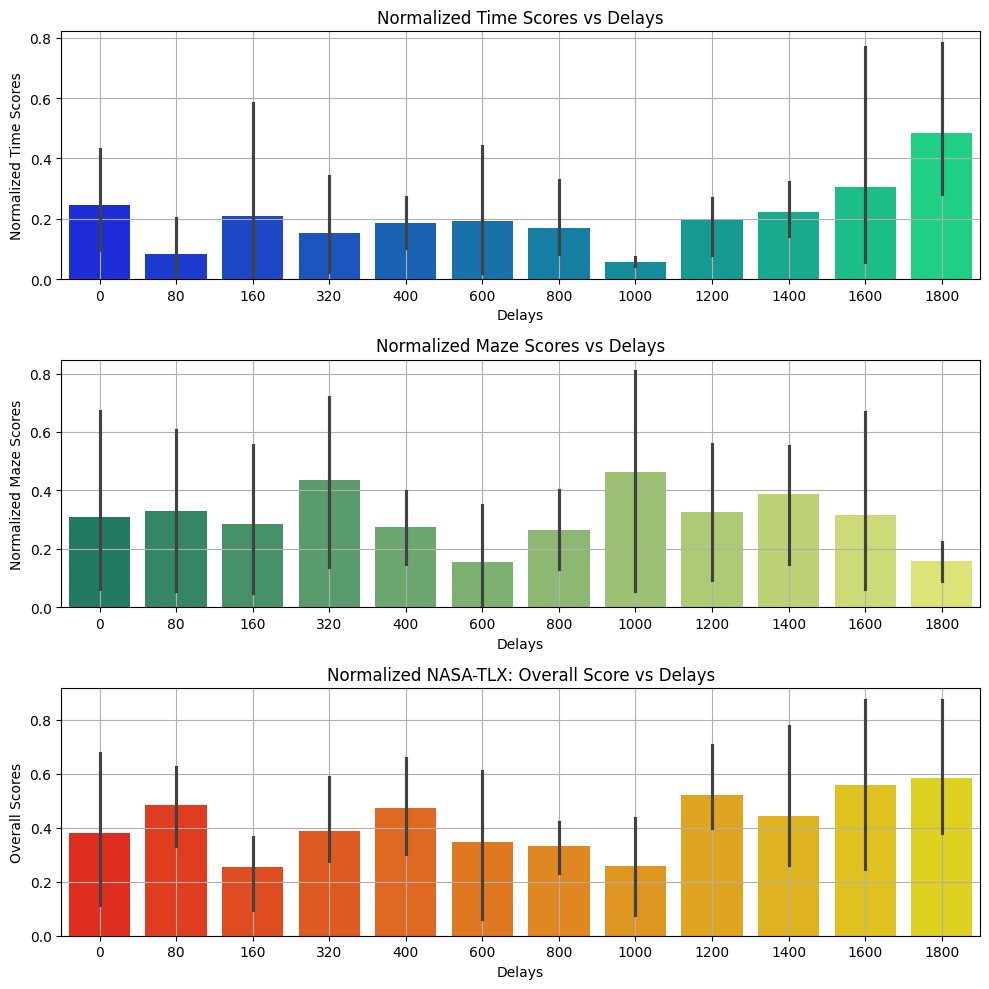

In [11]:
# Normalizing the data using Min-Max scaling (0-1)
def normalize_data(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# Normalize the data using the Min-Max scaling method 
normalized_data = normalize_data(data[['Time Scores', 'Maze score', 'Overall Score']]) # Select only the relevant columns for normalization 
normalized_data['Delays'] = data['Delays'] # Add the 'Delays' column back to the normalized data 

# Display the normalized data
normalized_data.head()
print(normalized_data.head())

# Bar plot of Normalized Time Scores vs Delays and Nromalized Maze Scores vs Delays
fig, axes = plt.subplots(3,1,figsize=(10, 10))

# Bar plot of Normalized Time Scores vs Delays
create_bar_plot(normalized_data, 'Delays', 'Time Scores', 'Normalized Time Scores vs Delays',
                'Delays', 'Normalized Time Scores', 'winter', axes[0])

# Bar plot of Normalized Maze Scores vs Delays
create_bar_plot(normalized_data, 'Delays', 'Maze score', 'Normalized Maze Scores vs Delays',
                'Delays', 'Normalized Maze Scores', 'summer', axes[1])

# Bar plot of Overall Scores vs Gaming Experience
create_bar_plot(normalized_data, 'Delays', 'Overall Score', 'Normalized NASA-TLX: Overall Score vs Delays',
                'Delays', 'Overall Scores', 'autumn', axes[2])

# Adjust layout
plt.tight_layout()
plt.show()

In [12]:
# Do a regression analysis on the normalized data
# Prepare a list to collect OLS regression results
regression_results_normalized = []

# Perform OLS regression for each dependent variable

for dependent_var in ['Time Scores', 'Maze score', 'Overall Score']:
    X = sm.add_constant(normalized_data['Delays'])  # Add a constant to the independent variable
    y = normalized_data[dependent_var]  # Dependent variable

    # Fit the OLS model
    model = sm.OLS(y, X).fit()

    # Get the confidence intervals for the independent variable
    conf_int = model.conf_int().loc['Delays']

    # Append the results to the list
    regression_results_normalized.append({
        "Dependent Variable": dependent_var,
        "Coefficient": model.params['Delays'],
        "Standard Error": model.bse['Delays'],
        "t-Value": model.tvalues['Delays'],
        "P>|t|": model.pvalues['Delays'],
        "95% Confidence Interval": f"[{conf_int[0]:.3f}, {conf_int[1]:.3f}]"
    })

# Convert the results to a DataFrame for better presentation
regression_summary_normalized_df = pd.DataFrame(regression_results_normalized)

# Display the consolidated OLS regression results
regression_summary_normalized_df


,Dependent Variable,Coefficient,Standard Error,t-Value,P>|t|,95% Confidence Interval
0,Time Scores,0.000105,0.000054,1.939169,0.059060,"[-0.000, 0.000]"
1,Maze score,-0.000025,0.000069,-0.357845,0.722210,"[-0.000, 0.000]"
2,Overall Score,0.000091,0.000058,1.565794,0.124727,"[-0.000, 0.000]"
